# Weighted sum

In [1]:
import numpy as np
import pandas as pd

In [2]:
nl1=2 #no. of nodes of layer 1
nl2=1 #no. of nodes of layer 2
w=np.array((np.random.rand(nl2,nl1)))
h=np.array((np.random.rand(nl1,1),np.random.rand(nl2,1)))

In [3]:
w

array([[0.34138071, 0.53611016]])

In [4]:
h

array([array([[0.21351331],
       [0.33716816]]), array([[0.0691624]])], dtype=object)

## bias

In [5]:
b=np.random.rand(nl2,1)
b

array([[0.71685479]])

# Inputs

In [6]:
h[0][0]=5
h[0][1]=2
h[0]

array([[5.],
       [2.]])

# Weighted sum (Feed forward)

In [7]:
cbs=w.dot(h[0])+b[0,0] #with bias
sbs=w.dot(h[0]) #withoout bias
sbs

array([[2.7791239]])

### Sigmoid function

In [8]:
def sigmoid(z):
 sigma=1/(1+np.exp(-z))
 return sigma
 

##  Perceptron Feedforward

In [9]:
h[0][0]=5
h[0][1]=2
bs=sigmoid(w.dot(h[0])+b[0,0]) #with bias
sbs=sigmoid(w.dot(h[0]))#without bias

print('con bias'+str(bs)+'sin bias'+str(sbs))

con bias[[0.97057313]]sin bias[[0.94153724]]


# Cost function

In [10]:
def cost(y,h):
    C=(y-h)**2
    return C

In [11]:
y=.71
Cb=cost(y,bs)
Cbs=cost(y,sbs)
#Cb=(y-bs)**2
#Cbs=(y-sbs)**2
print('costo con bias'+str(Cb)+'costo sin bias'+str(Cbs))

costo con bias[[0.06789836]]costo sin bias[[0.05360949]]


# Backpropagation

## defining the gradient descents derivates

In [12]:
def dC(y,h): #dC/dh
 dcdh=-2*(y-h)
 return dcdh
def dh(z): #dh/dz
 dhdz=sigmoid(z)*(1-sigmoid(z))
 return dhdz
def dz(h): #dz/dw
 dzdw=h
 return dzdw

In [13]:
#Training our perceptron

In [42]:
nl1=2 #nodes in Layer 1
nl2=1 #nodes in Layer 2
etha=.5 #Learning rate 
epoc=100 #number of epochs
#alpha=2
w=np.array((np.random.rand(nl2,nl1)))
h=np.array((np.random.rand(nl1,1),np.random.rand(nl2,1)))
b=np.random.rand(nl2,1) #initialize weights, neurons, and bias matrix
print('pesos iniciales',w)
print('bias inicial',b)
#Determine training matrix 
Dw=np.array(np.random.rand(1,2))
y=np.array(.71) #Determine the "correct answer"
h[0][0]=5 
h[0][1]=2 #Determine inputs
costo=[]
pesos=[]
for e in range(epoc):
 #etha=etha*(np.exp(-alpha*e))   #use it carefully for a variable learning rate
 #z=w.dot(h[0])+b 
 pesos.append(w[0])
 z=w.dot(h[0])
 h[1]=sigmoid(z)#without bias
 C=cost(y,h[1])
 #C=(y-h[1])**2
 Dw=np.transpose(dC(y,h[1])*dh(z)*dz(h[0]))
 Db=dC(y,h[1])*dh(z)
 w=w-(etha*Dw)
 b=b-(etha*Db)
 print('costo',C)
 if C==0:
    print('break in epoch',e)
    break
 costo.append(C[0])
# pesos.append(w[0])

pesos iniciales [[0.98611361 0.55968332]]
bias inicial [[0.61387078]]
costo [[0.0827411]]
costo [[0.08271441]]
costo [[0.08268666]]
costo [[0.0826578]]
costo [[0.08262774]]
costo [[0.08259642]]
costo [[0.08256376]]
costo [[0.08252966]]
costo [[0.08249404]]
costo [[0.08245678]]
costo [[0.08241778]]
costo [[0.08237692]]
costo [[0.08233404]]
costo [[0.08228902]]
costo [[0.08224167]]
costo [[0.08219182]]
costo [[0.08213927]]
costo [[0.08208379]]
costo [[0.08202514]]
costo [[0.08196303]]
costo [[0.08189717]]
costo [[0.08182719]]
costo [[0.08175271]]
costo [[0.08167329]]
costo [[0.08158842]]
costo [[0.08149753]]
costo [[0.08139997]]
costo [[0.08129499]]
costo [[0.08118173]]
costo [[0.08105917]]
costo [[0.08092616]]
costo [[0.08078131]]
costo [[0.08062301]]
costo [[0.08044935]]
costo [[0.080258]]
costo [[0.08004621]]
costo [[0.0798106]]
costo [[0.07954701]]
costo [[0.07925032]]
costo [[0.07891405]]
costo [[0.07853003]]
costo [[0.07808768]]
costo [[0.07757321]]
costo [[0.07696822]]
costo [[0.0

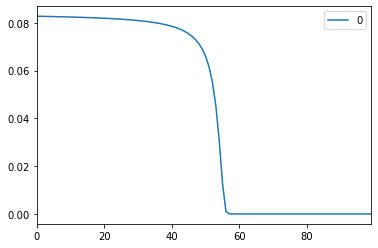

In [43]:
costo1=pd.DataFrame(costo)
costo1.plot()

In [44]:
pesos1=pd.DataFrame(pesos)
pesos1[1]

0     0.559683
1     0.558333
2     0.556957
3     0.555553
4     0.554120
        ...   
95    0.204197
96    0.204197
97    0.204197
98    0.204197
99    0.204197
Name: 1, Length: 100, dtype: float64

# Implementation

In [45]:
b #perfect[[-0.06502874]]

array([[0.43612766]])

In [46]:
w #perfect weight with bias [[0.15726836,0.08703549]] perfect weights without bias [[0.09533541,0.20935351]]

array([[0.09739798, 0.20419707]])

In [47]:
h[0][0]=5
h[0][1]=2
bs=sigmoid(w.dot(h[0])+b[0,0]) #con bias
sbs=sigmoid(w.dot(h[0]))#sin bias
sbs

array([[0.71]])

In [48]:
#Using Keras

In [49]:
import tensorflow as tf #1st part
from tensorflow  import keras #2d part of a CNN
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

In [50]:
x_train=np.array([[5,2]])
y_train=np.array([[.71]])
x_test=x_train
y_test=y_train

In [51]:
model=keras.Sequential()
model.add(keras.Input(shape=2))
model.add(layers.Dense(1,activation='sigmoid'))
#print(model.summary())
model.compile(loss="MSE",optimizer=keras.optimizers.SGD(lr=.5),metrics=['accuracy'],)
model.fit(x_train,y_train,epochs=100,verbose=2)
#model.evaluate(x_test,y_test,verbose=1)
model.summary()
print(len(model.weights))
print(model.weights)

Train on 1 samples
Epoch 1/100
1/1 - 0s - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 2/100
1/1 - 0s - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 3/100
1/1 - 0s - loss: 2.2256e-05 - accuracy: 0.0000e+00
Epoch 4/100
1/1 - 0s - loss: 1.8498e-06 - accuracy: 0.0000e+00
Epoch 5/100
1/1 - 0s - loss: 1.3189e-07 - accuracy: 0.0000e+00
Epoch 6/100
1/1 - 0s - loss: 9.8489e-09 - accuracy: 0.0000e+00
Epoch 7/100
1/1 - 0s - loss: 7.2583e-10 - accuracy: 0.0000e+00
Epoch 8/100
1/1 - 0s - loss: 5.2879e-11 - accuracy: 0.0000e+00
Epoch 9/100
1/1 - 0s - loss: 3.8689e-12 - accuracy: 0.0000e+00
Epoch 10/100
1/1 - 0s - loss: 2.8777e-13 - accuracy: 0.0000e+00
Epoch 11/100
1/1 - 0s - loss: 3.1974e-14 - accuracy: 0.0000e+00
Epoch 12/100
1/1 - 0s - loss: 3.5527e-15 - accuracy: 0.0000e+00
Epoch 13/100
1/1 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 14/100
1/1 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 15/100
1/1 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 16/100
1/1 - 0s - loss: 0.0000e+

In [52]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.11373878],
        [ 0.7432451 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.0224124], dtype=float32)>]

In [53]:
model.predict(x_train)

array([[0.71]], dtype=float32)

# Weight valley system  visualization

In [54]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [69]:

def z(w1,w2,y):
 return (y-(sigmoid(w1*h[0][0]+w2*h[0][1])))**2
y=.71
def f(height,azimuth):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(-1,1,100)
 w2=np.linspace(-1,1,100)
 w1, w2 =np.meshgrid(w1,w2)
 ax.plot_surface(w1, w2, z(w1,w2,y),cmap='cividis')
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(height,azimuth)
 plt.show()
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()

interactive_plot = interactive(f, height=(0, 90), azimuth=(0, 100, 1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#Usually can be seen nice with height=20 and azimuth=80

interactive(children=(IntSlider(value=45, description='height', max=90), IntSlider(value=50, description='azim…

In [70]:
def f(height,azimuth):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(pesos1[0][0],pesos1[0][len(pesos1)-1],100)
 w2=np.linspace(pesos1[1][0],pesos1[1][len(pesos1)-1],100)
 w1, w2 =np.meshgrid(w1,w2)
 ax.plot_surface(w1, w2, z(w1,w2,y),cmap='cividis')
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(height,azimuth)
 plt.show()
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()

interactive_plot = interactive(f, height=(-90, 90,5), azimuth=(-0, 160, 5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#Usually can be seen nice with height=20 and azimuth=80

interactive(children=(IntSlider(value=0, description='height', max=90, min=-90, step=5), IntSlider(value=80, d…

In [71]:

def f(altura,azimuth,rang1,rang2):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(rang1,rang2,100)
 w2=np.linspace(rang1,rang2,100)
 w1, w2 =np.meshgrid(w1,w2)
 ax.plot_surface(w1, w2, z(w1,w2,y),cmap='cividis')
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1],y),c='r')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(altura,azimuth)
 plt.show()
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()

interactive_plot = interactive(f, altura=(0, 90,10), azimuth=(0, 120, 5),rang1=(-10,0,.1),rang2=(0,10,.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#w1=np.linspace(pesos1[0][0],pesos1[0][len(pesos1)-1],100)
#w2=np.linspace(pesos1[1][0],pesos1[1][len(pesos1)-1],100)

interactive(children=(IntSlider(value=40, description='altura', max=90, step=10), IntSlider(value=60, descript…